In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
#Source: https://stackoverflow.com/a/42314798

def plotimage(img, title=None, figsize=None):
    h = img.shape[0]
    w = img.shape[1]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])    
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()


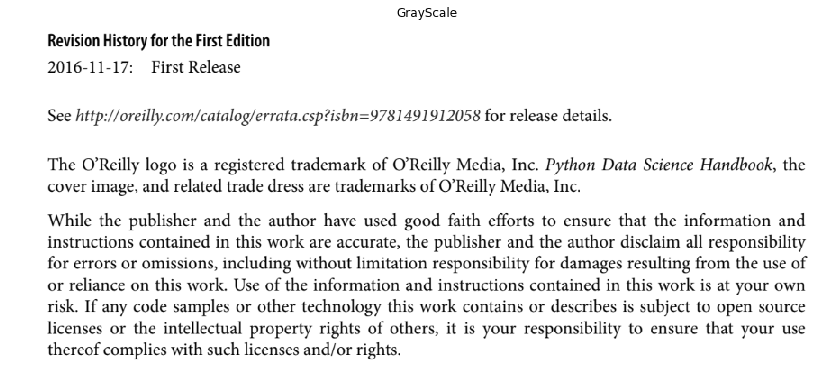

In [3]:
img = cv2.imread('images/01.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plotimage(gray, 'GrayScale')

## Convert to Black and White

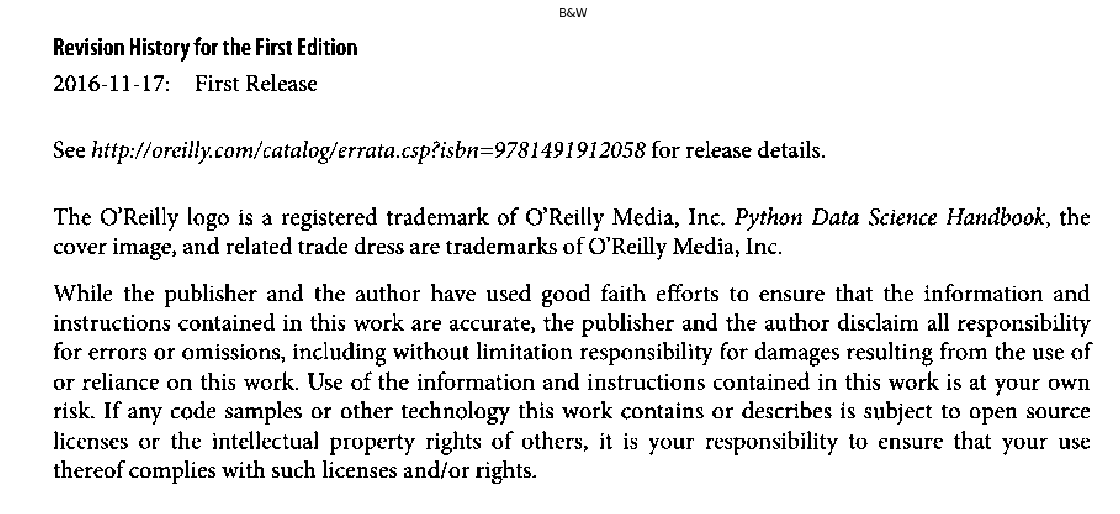

In [4]:
bw = gray.copy()
thresh = 170
bw[bw<thresh]=0
bw[bw>=thresh]=255
plotimage(bw, 'B&W', figsize=(15,15))


### Vertical Segmentation

In [21]:
lines = []

width = bw.shape[1]
height = bw.shape[0]

white = 255
black = 0 
i = 0
start = 0
while True:
    if black not in bw[i,:] or i==height-1: 
        if i!=start:
            lines.append({'start': start,'end': i-1})            
        start=i+1
        
    if i==height-1:
        break
    i+=1    

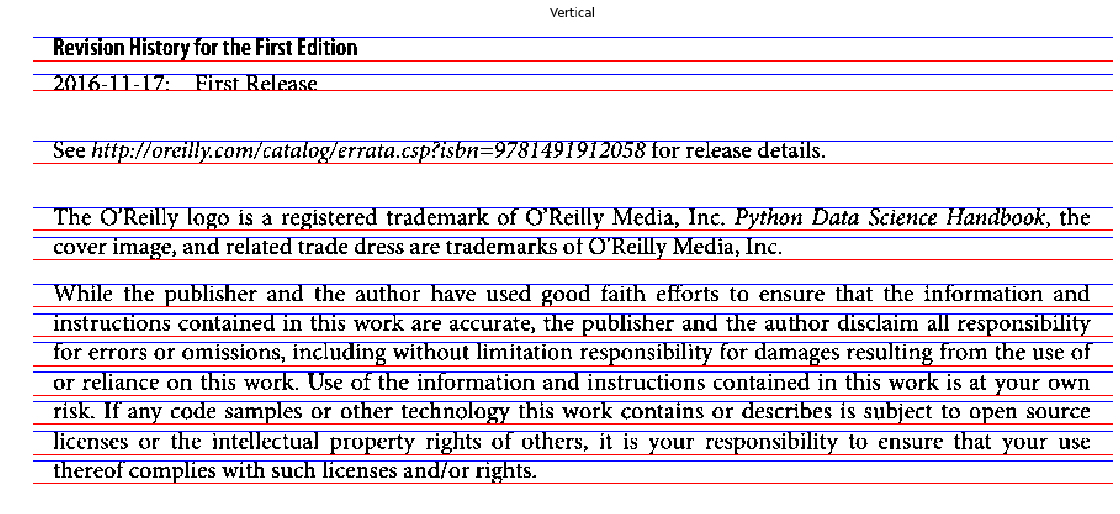

In [83]:
vert = bw[:]
vert=cv2.cvtColor(vert, cv2.COLOR_GRAY2RGB)
for line in lines:
    start = line['start']
    end = line['end']
    cv2.line(vert, (0,start), (width,start), (0,0,255))
    cv2.line(vert, (0,end), (width,end), (255,0,0))
plotimage(vert, 'Vertical', figsize=(15,15))


In [36]:
i = 0
start = 0

for line in lines:
    img = bw[line['start']:line['end'],:]
    line['chars'] = []
    j = 0
    start = 0
    while True:
        if black not in img[:,j] or j==width-1: 
            if j!=start:
                line['chars'].append({'start':start,'end':j-1})            
            start=j+1

        if j==width-1:
            break
        j+=1        

### Horizontal Segmentation

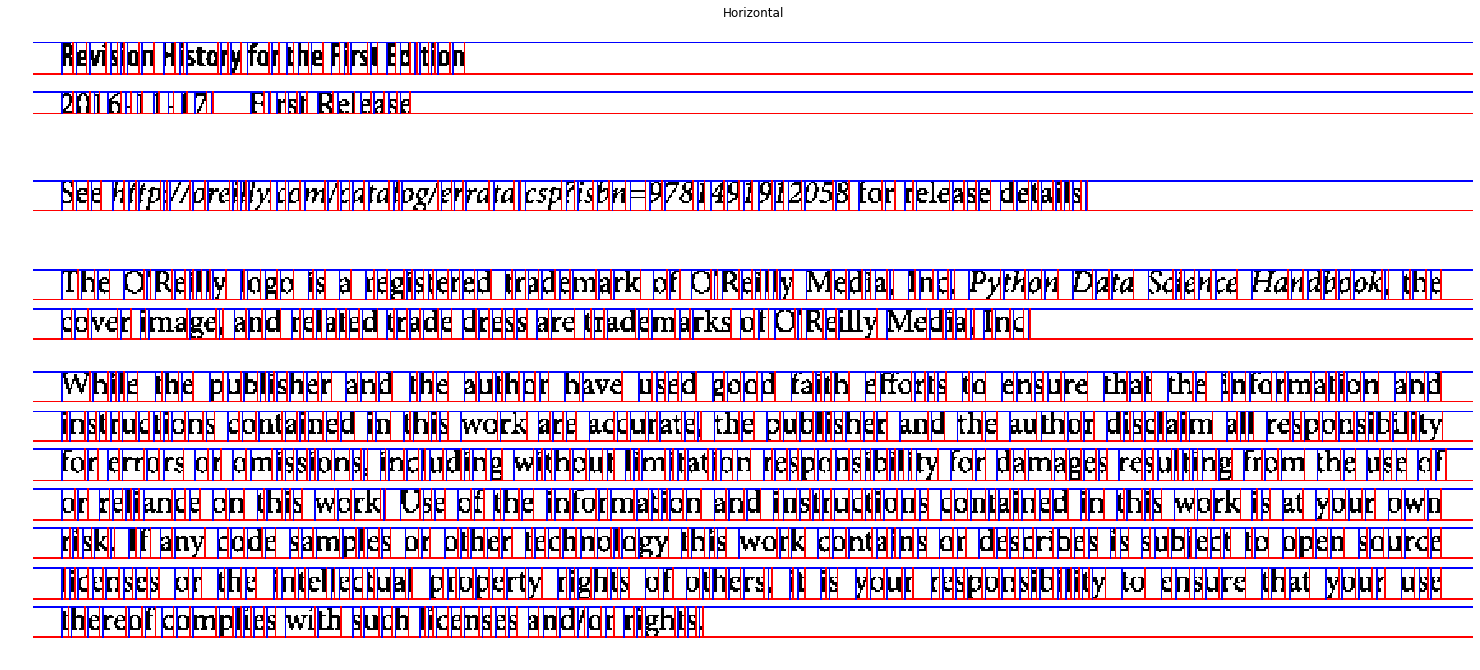

In [85]:
hor = vert.copy()
for line in lines:
    start = line['start']
    end = line['end']
    for char in line['chars']:
        char_start = char['start']
        char_end = char['end']
        cv2.line(hor, (char_start,start), (char_start,end), (0,0,255))  
        cv2.line(hor, (char_end,start), (char_end,end), (255,0,0))  
    #break
        
plotimage(hor, 'Horizontal', figsize=(20,20))


## Plotting Some Random chars

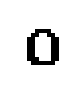

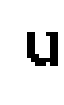

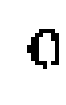

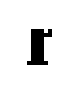

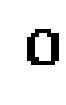

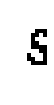

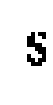

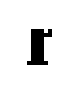

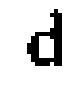

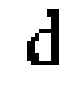

In [101]:
for k in range(10):
    i = random.randint(0,len(lines)-1)
    line = lines[i]
    j = random.randint(0,len(line['chars'])-1)
    char = line['chars'][j]
    
    img = bw[line['start']:line['end'],char['start']:char['end']]
    
    plotimage(img,'',(1,1))